# Unit 2 Lesson 4 Challenge: make your own regression model

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn import preprocessing
import math
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
fbi_data = pd.read_csv('offenses_known_to_law_enforcement1.csv')

### Exploring the data

In [3]:
fbi_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
fbi_data.describe()

,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000,0.000,187.000
mean,1.566,nan,1.872
std,18.304,nan,10.693
min,0.000,nan,0.000
25%,0.000,nan,0.000
50%,0.000,nan,0.000
75%,0.000,nan,1.000
max,335.000,nan,132.000


### Data Cleaning

In [5]:
fbi_data = fbi_data.drop(['Rape\n(revised\ndefinition)1'], axis =1)

In [6]:
fbi_data.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape2', 'Robbery', 'AggAssault', 'PropCrime', 'Burglary', 'Larceny', 'AutoTheft', 'Arson']

In [7]:
fbi_data = fbi_data.fillna(0)

In [8]:
# Need to convert the column's data from strings

fbi_data['Arson'] = fbi_data['Arson'].astype(int)
fbi_data['Robbery'] = fbi_data['Robbery'].str.replace(',', '')
fbi_data['Population'] = fbi_data['Population'].str.replace(',', '')
fbi_data['Robbery'] = fbi_data['Robbery'].astype(int)
fbi_data['Population'] = fbi_data['Population'].astype(int)
fbi_data['PropCrime'] = fbi_data['PropCrime'].str.replace(',', '')
fbi_data['Larceny'] = fbi_data['Larceny'].str.replace(',', '')
fbi_data['AutoTheft'] = fbi_data['AutoTheft'].str.replace(',', '')
fbi_data['Rape2'] = fbi_data['Rape2'].str.replace(',', '')
fbi_data['PropCrime'] = fbi_data['PropCrime'].astype(int)
fbi_data['Rape2'] = fbi_data['Rape2'].astype(int)
fbi_data['Murder'] = fbi_data['Murder'].astype(int)
fbi_data['Burglary'] = fbi_data['Burglary'].str.replace(',', '')
fbi_data['Burglary'] = fbi_data['Burglary'].astype(int)
fbi_data['Larceny'] = fbi_data['Larceny'].astype(int)
fbi_data['AutoTheft'] = fbi_data['AutoTheft'].astype(int)

In [9]:
# revisiting feature cleaning after analsis of residuals
fbi_data = fbi_data[fbi_data['PropCrime']< fbi_data['PropCrime'].quantile(0.95)]

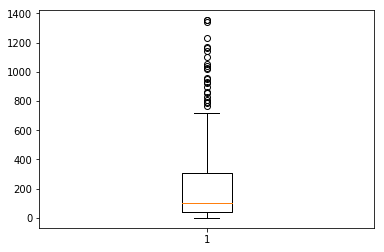

In [10]:
plt.boxplot(fbi_data['PropCrime']);

###  Creating a new feature and fitting the model

In [11]:
fbi_data['Rape_bi'] = fbi_data['Rape2'].apply(lambda x: 1 if x >= 1 else 0)
fbi_data['Robbery_bi'] = fbi_data['Robbery'].apply(lambda x: 1 if x >= 1 else 0)
fbi_data['Murder_bi'] = fbi_data['Murder'].apply(lambda x: 1 if x >= 1 else 0)
fbi_data['Larceny_bi'] = fbi_data['Larceny'].apply(lambda x: 1 if x >= 1 else 0)
fbi_data['AutoTheft_bi'] = fbi_data['AutoTheft'].apply(lambda x: 1 if x >= 1 else 0)
fbi_data['Popx2'] = fbi_data['Population']** 2

new_fbi_data_col = ["Population", "Rape2", "PropCrime", 'Robbery', 'Rape_bi', 'Robbery_bi', 'Popx2',
                    'Murder', 'Murder_bi',  'AutoTheft_bi' , 'AutoTheft', 'Larceny_bi', 'Larceny']
new_fbi_data = fbi_data[new_fbi_data_col]

In [12]:
regr = linear_model.LinearRegression()
Y = new_fbi_data['PropCrime'].values.reshape(-1, 1)
X = new_fbi_data[["Population", "Rape2", "Robbery", 'Rape_bi', 'Robbery_bi', 'Popx2', 'Murder',
                  'Murder_bi', 'AutoTheft_bi' , 'AutoTheft', 'Larceny_bi', 'Larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  2.86958905e-04   4.15659223e+00   9.01433563e-01  -8.92755374e-01
    1.22516993e+00  -3.24701332e-09  -9.45629186e+00   8.80678146e+00
    1.46246556e+00   1.47744350e+00   1.78852333e+00   1.09463806e+00]]

Intercept: 
 [-0.222691]

R-squared:
0.995693747904


In [13]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = new_fbi_data['PropCrime']
predicted = predicted.astype(float)
actual = actual.astype(float)
# Calculate the error, also called the residual.
residual = actual - predicted

### Verifiying the model meets Multivariable criteria

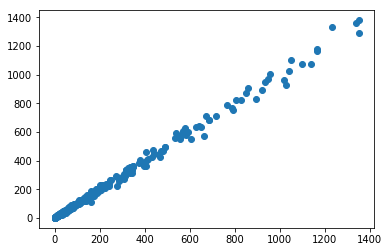

In [14]:
plt.scatter(actual, predicted)
plt.show()

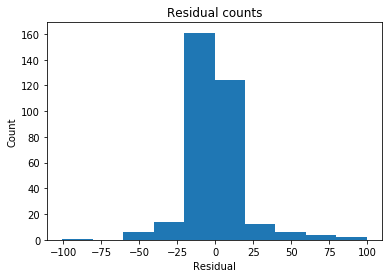

In [15]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

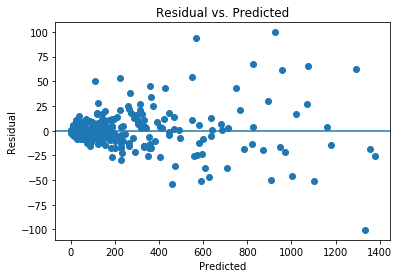

In [16]:
# the errors are fairly consistent for the new predicted values
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
# As expected there is high correlation between the features between the features I made and the feature I created it from
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Rape2,Robbery,Rape_bi,Robbery_bi,Popx2,Murder,Murder_bi,AutoTheft_bi,AutoTheft,Larceny_bi,Larceny
Population,1.000,0.427,0.494,0.479,0.472,0.465,0.414,0.486,0.377,0.646,0.121,0.785
Rape2,0.427,1.000,0.544,0.577,0.326,0.221,0.422,0.416,0.195,0.474,0.067,0.583
Robbery,0.494,0.544,1.000,0.310,0.269,0.109,0.839,0.425,0.177,0.825,0.046,0.499
Rape_bi,0.479,0.577,0.310,1.000,0.448,0.274,0.218,0.323,0.260,0.394,0.116,0.558
Robbery_bi,0.472,0.326,0.269,0.448,1.000,0.288,0.186,0.279,0.434,0.341,0.173,0.520
Popx2,0.465,0.221,0.109,0.274,0.288,1.000,0.049,0.194,0.235,0.198,0.064,0.423
Murder,0.414,0.422,0.839,0.218,0.186,0.049,1.000,0.647,0.134,0.643,0.033,0.346
Murder_bi,0.486,0.416,0.425,0.323,0.279,0.194,0.647,1.000,0.198,0.422,0.052,0.471
AutoTheft_bi,0.377,0.195,0.177,0.260,0.434,0.235,0.134,0.198,1.000,0.310,0.235,0.363
AutoTheft,0.646,0.474,0.825,0.394,0.341,0.198,0.643,0.422,0.310,1.000,0.073,0.646


## Without Popx2 and Rape_bi

In [40]:
regr = linear_model.LinearRegression()
Y = new_fbi_data['PropCrime'].values.reshape(-1, 1)
X = new_fbi_data[["Population", "Rape2", "Robbery", 'Robbery_bi', 'Murder',
                  'Murder_bi', 'AutoTheft_bi' , 'AutoTheft', 'Larceny_bi', 'Larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  2.33414996e-04   4.06727752e+00   9.03424909e-01   9.47021257e-01
   -9.17269464e+00   8.63932334e+00   1.29732746e+00   1.49373651e+00
    1.84326985e+00   1.09347760e+00]]

Intercept: 
 [-0.1592819]

R-squared:
0.995673681873


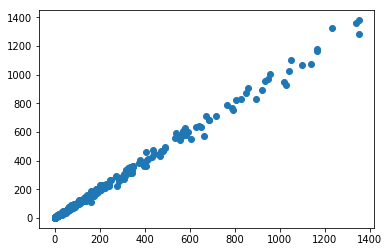

In [29]:
new_pred = regr.predict(X).ravel()
actual = new_fbi_data['PropCrime']

new_res = actual - new_pred

plt.scatter(actual, new_pred)
plt.show()

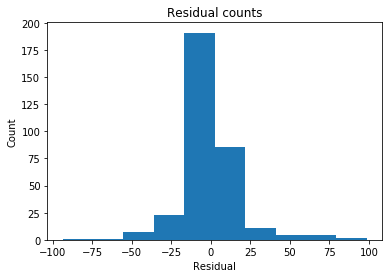

In [30]:
plt.hist(new_res)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

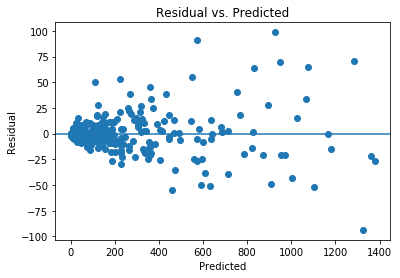

In [31]:
plt.scatter(new_pred, new_res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()